**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   EQUIPO 36
    - Andrea Sánchez Martínez A01795414
    - Juan Carlos Garza Sánchez A00821522
    - Miguel Angel Mayori Vera A01795046
    - Sergio Pulido Morales A01794935

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

In [3]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [4]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
cereals_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       21
sugars      16
potass      35
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

<AxesSubplot:>

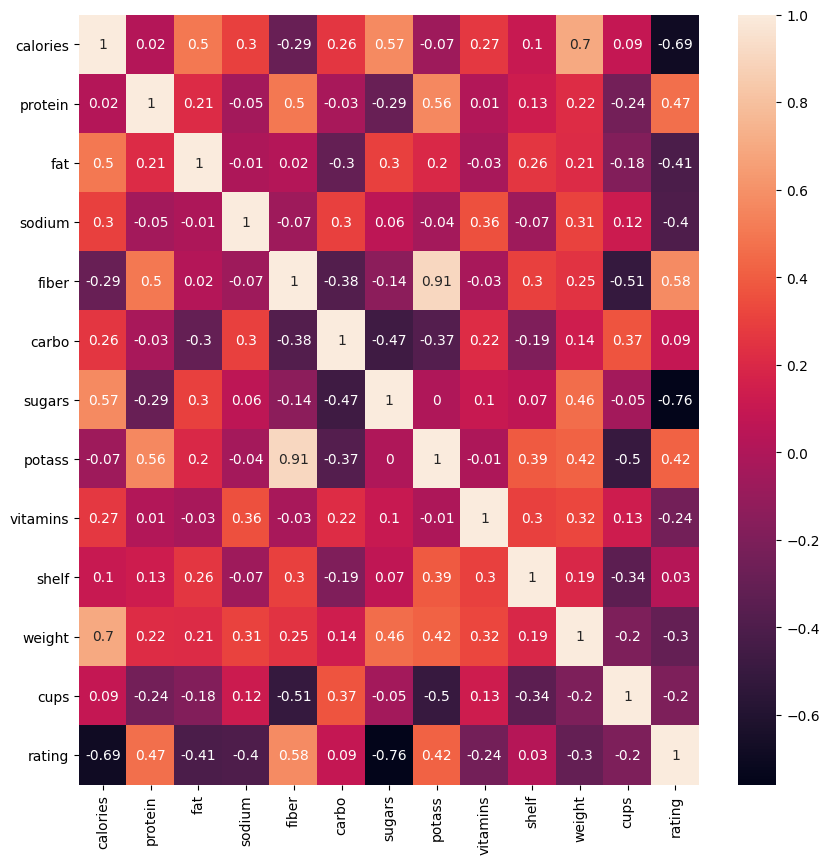

In [7]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(round(cereals_df.corr(),2), annot = True)

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

Frecuencua de variable `shelf`:

<AxesSubplot:>

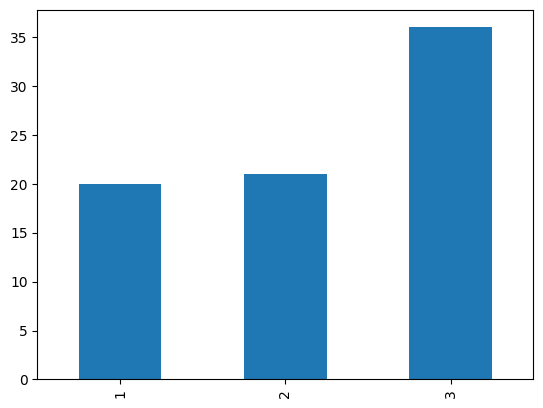

In [8]:
cereals_df['shelf'].value_counts(ascending=True).plot(kind='bar')

In [9]:
print("Frecuencia de conteo para la variable shelf:")
cereals_df["shelf"].value_counts(ascending=True)

Frecuencia de conteo para la variable shelf:


1    20
2    21
3    36
Name: shelf, dtype: int64

Frecuencua de variable `mfr`:

<AxesSubplot:>

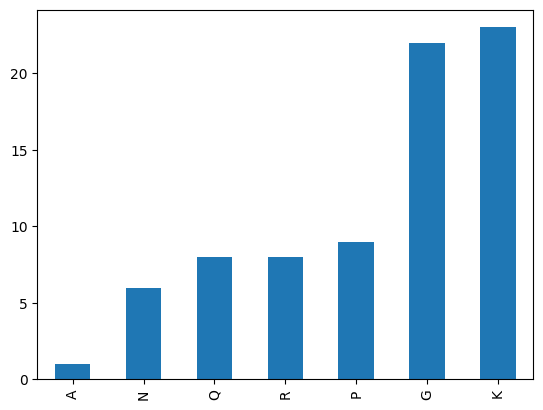

In [10]:
cereals_df['mfr'].value_counts(ascending=True).plot(kind='bar')

In [11]:
print("Frecuencia de conteo para la variable mfr:")
cereals_df["mfr"].value_counts(ascending=True)

Frecuencia de conteo para la variable mfr:


A     1
N     6
Q     8
R     8
P     9
G    22
K    23
Name: mfr, dtype: int64

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

<AxesSubplot:xlabel='mfr,shelf'>

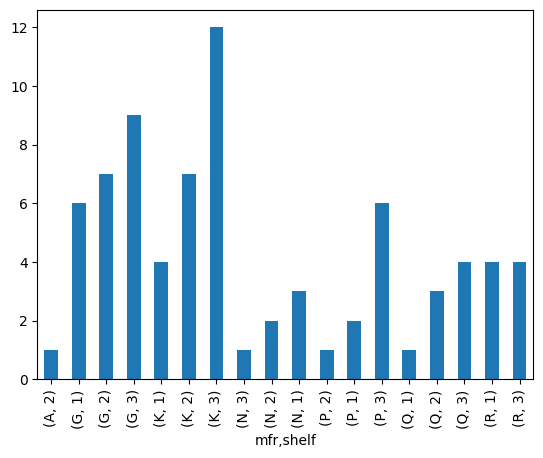

In [12]:
cereals_df.groupby("mfr")["shelf"].value_counts(ascending=True).plot(kind='bar')

In [13]:
print("Conteo de frecuencia para la variable shelf segmentada por fabricante:")
cereals_df.groupby("mfr")["shelf"].value_counts(ascending=True)

Conteo de frecuencia para la variable shelf segmentada por fabricante:


mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    3         1
     2         2
     1         3
P    2         1
     1         2
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
Name: shelf, dtype: int64

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [14]:
cereals_df.rating.mode()[0]

from collections import Counter

col_freq = cereals_df['rating']
rango = col_freq.max() - col_freq.min()
print("El rango de la variable es:", rango)

def rango_modal(df):
    counts = Counter(df)
    moda = [item for item, count in counts.items() if count == max(counts.values())]
    return moda

rango_moda = rango_modal(col_freq)
print("El rango modal de la variable es:", rango_moda)
rango_moda2 = col_freq.mode()
print("El rango modal de la variable es:", rango_moda2)

El rango de la variable es: 75.662061
El rango modal de la variable es: [68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541, 33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999, 19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791, 22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856, 32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765, 35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292, 31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074, 26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965, 29.924285, 40.69232, 59.642837, 30.450843, 37.840594, 41.50354, 60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034, 55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787, 31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844, 39.106174, 27.753301, 49.787445, 51.592193, 36.187559]
El rango modal de la variable es: 0     18.042851
1     19.823573
2     21.871292
3 

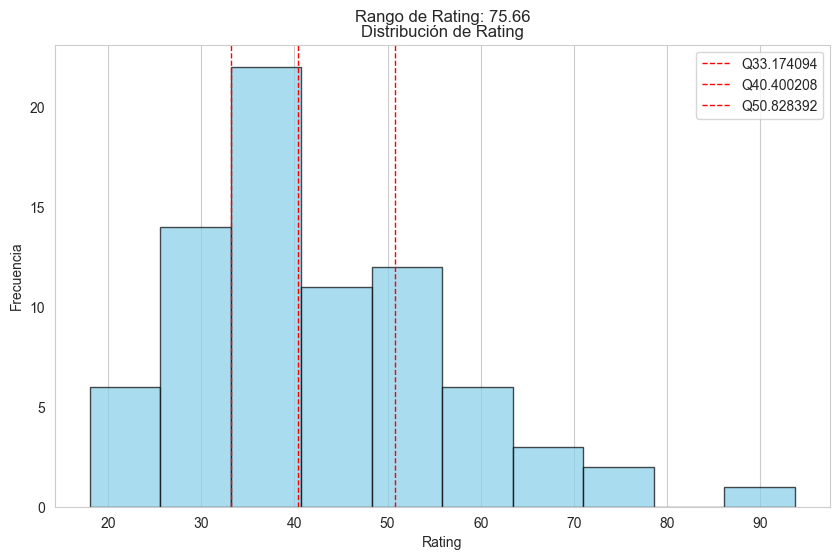

<AxesSubplot:xlabel='rating', ylabel='Count'>

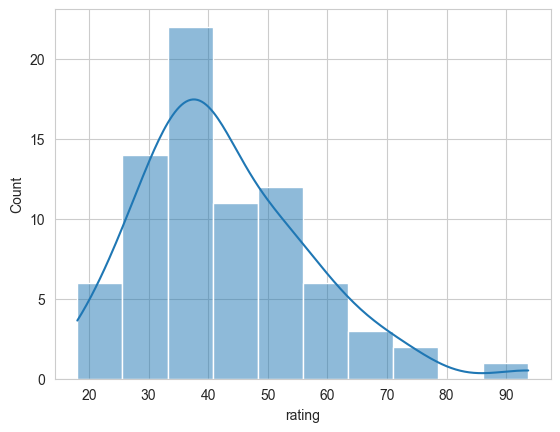

In [15]:
sns.set_style("whitegrid")
num_bins = 10
plt.figure(figsize=(10, 6))

#num_bins = 20

# Crea el histograma
plt.hist(cereals_df['rating'], bins=num_bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Rating')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Agrega líneas para marcar los cuartiles
quartiles = cereals_df['rating'].quantile([0.25, 0.5, 0.75])
for quartile in quartiles:
    plt.axvline(quartile, color='r', linestyle='--', linewidth=1, label=f'Q{quartile}')

# Agrega el rango como anotación en la parte superior del gráfico
plt.annotate(f'Rango de Rating: {rango:.2f}', xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=12)

plt.legend()
plt.show()

# Sergio P
sns.histplot(data=cereals_df, x="rating", kde='true')

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [16]:
# Selecciona los 10 cereales mejor puntuados
top_10_cereales = cereals_df.nlargest(10, 'rating')

# Muestra la lista de los 10 cereales más puntuados
print("Los 10 Cereales Más Puntuados y su fabricante:")
print(top_10_cereales[['name', 'rating', 'mfr']])

Los 10 Cereales Más Puntuados y su fabricante:
                         name     rating mfr
3   All-Bran_with_Extra_Fiber  93.704912   K
64     Shredded_Wheat_'n'Bran  74.472949   N
65  Shredded_Wheat_spoon_size  72.801787   N
0                   100%_Bran  68.402973   N
63             Shredded_Wheat  68.235885   N
20     Cream_of_Wheat_(Quick)  64.533816   N
55               Puffed_Wheat  63.005645   Q
54                Puffed_Rice  60.756112   Q
50          Nutri-grain_Wheat  59.642837   K
2                    All-Bran  59.425505   K


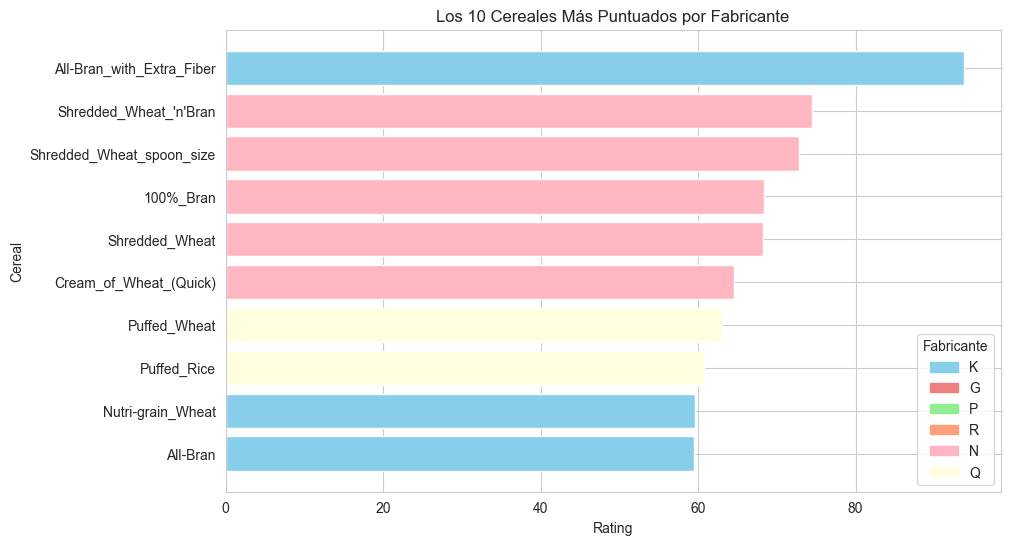

In [17]:
colores_fabricantes = {
    'K': 'skyblue',
    'G': 'lightcoral',
    'P': 'lightgreen',
    'R': 'lightsalmon',
    'N': 'lightpink',
    'Q': 'lightyellow',
}

# Asigna colores a los cereales según su fabricante
top_10_cereales['color'] = top_10_cereales['mfr'].map(colores_fabricantes)

# Crea un gráfico de barras horizontales que muestra el rating de los 10 cereales con colores por fabricante
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_cereales['name'], top_10_cereales['rating'], color=top_10_cereales['color'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Los 10 Cereales Más Puntuados por Fabricante')

# Crea una leyenda que muestra los colores asociados a los fabricantes
legend_labels = {fabricante: color for fabricante, color in colores_fabricantes.items()}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_labels.values()]
plt.legend(legend_handles, legend_labels.keys(), title="Fabricante")

plt.gca().invert_yaxis()  # Para que el cereal mejor puntuado esté en la parte superior

plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

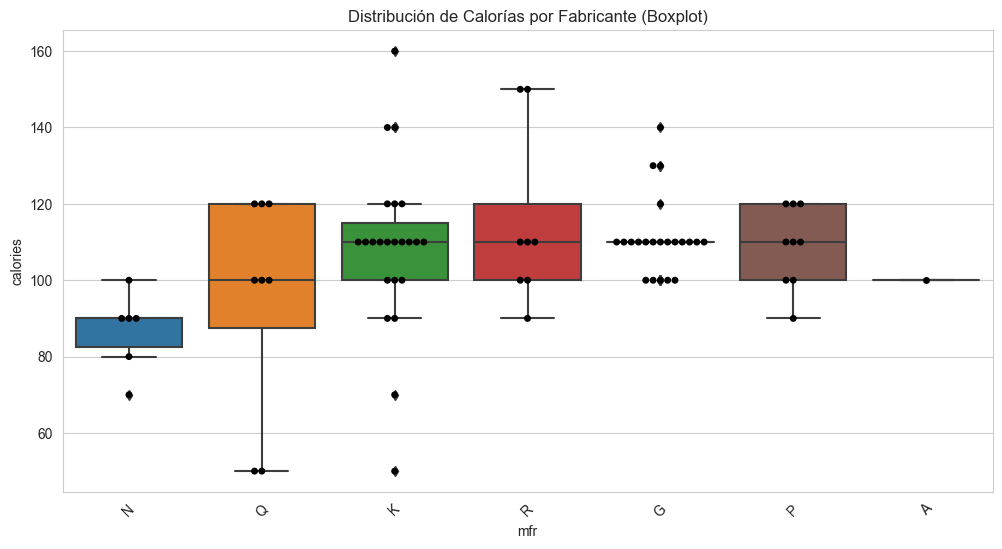

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cereals_df, x='mfr', y='calories')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.title('Distribución de Calorías por Fabricante (Boxplot)')
sns.swarmplot(data=cereals_df, x='mfr', y='calories', color='black', size=5)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

In [19]:
print("Las variabeles de mayor correlación son:")
cereals_df.corr()['rating'].sort_values(ascending=False).iloc[1:3]

Las variabeles de mayor correlación son:


fiber      0.584160
protein    0.470618
Name: rating, dtype: float64

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [20]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

In [21]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [22]:
y = cereals_df["rating"]
X = cereals_df.select_dtypes(include=['number']).drop('rating', axis=1)

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

pca_model = pca_pipe.named_steps['pca']
pca_df = pd.DataFrame(pca_model.components_,columns=X.columns)
pca_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,0.036594,0.330888,0.212549,-0.050894,0.458623,-0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,-0.371154
1,-0.571142,0.045367,-0.249143,-0.304684,0.201029,-0.175660,-0.364844,0.070345,-0.300574,-0.065114,-0.448962,-0.106553
2,-0.077927,0.326405,-0.291274,0.343108,0.173912,0.513002,-0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
3,-0.164032,-0.281265,-0.124324,-0.168916,-0.075295,-0.071305,0.016033,-0.112708,0.594798,0.667703,-0.160396,-0.030683
4,0.186667,0.372134,0.597422,-0.292344,-0.229653,0.191830,-0.360371,-0.124888,-0.105582,0.265485,-0.232905,0.115826
5,-0.196806,0.176822,0.299822,0.462005,0.084635,-0.446257,0.061289,0.068499,0.279949,-0.133268,-0.316544,0.464295
6,0.062276,0.260647,-0.247778,-0.608269,0.095668,-0.026962,0.186843,0.147455,0.168034,-0.124162,0.186826,0.593052
7,-0.004882,-0.418610,0.054129,0.167525,0.218240,0.172049,-0.067793,0.265667,-0.460537,0.416013,0.076551,0.500321
8,0.043225,0.518397,-0.438048,0.247337,-0.258082,-0.135796,0.251199,-0.186550,-0.337770,0.415500,-0.067996,0.045104
9,0.495843,-0.019565,-0.147950,-0.005456,0.292832,0.243900,0.247413,0.185987,0.051953,-0.047086,-0.692720,-0.077575


In [23]:
componentes_principales = pca_model.components_
varianza_explicada = pca_model.explained_variance_ratio_
print("Varianza explicada por componentes principales:", varianza_explicada)

Varianza explicada por componentes principales: [0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713 0.03467223 0.02614423 0.00764976 0.0046911  0.00150535]


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

           0
0   0.276615
1   0.497212
2   0.646048
3   0.730845
4   0.812869
5   0.870350
6   0.925337
7   0.960010
8   0.986154
9   0.993804
10  0.998495
11  1.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


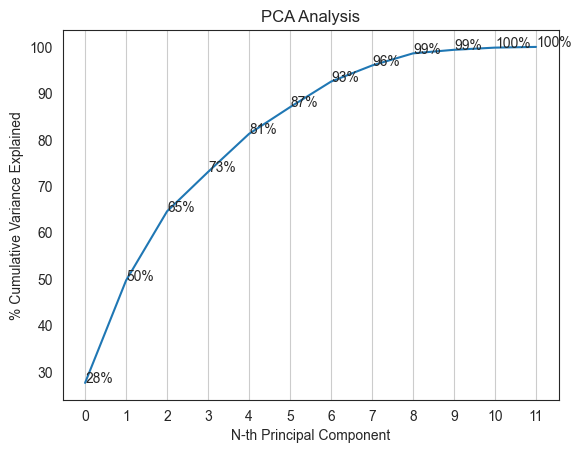

None

* Se necesitan minimo 7 componentes para explicar más del 90% de la varianza.

   calories   protein       fat    sodium     fiber     carbo    sugars  \
0  0.036594  0.330888  0.212549 -0.050894  0.458623 -0.268609  0.081440   
1 -0.571142  0.045367 -0.249143 -0.304684  0.201029 -0.175660 -0.364844   
2 -0.077927  0.326405 -0.291274  0.343108  0.173912  0.513002 -0.495338   
3 -0.164032 -0.281265 -0.124324 -0.168916 -0.075295 -0.071305  0.016033   
4  0.186667  0.372134  0.597422 -0.292344 -0.229653  0.191830 -0.360371   
5 -0.196806  0.176822  0.299822  0.462005  0.084635 -0.446257  0.061289   
6  0.062276  0.260647 -0.247778 -0.608269  0.095668 -0.026962  0.186843   

     potass  vitamins     shelf    weight      cups  
0  0.502603  0.018839  0.308929  0.257160 -0.371154  
1  0.070345 -0.300574 -0.065114 -0.448962 -0.106553  
2  0.130460  0.327563  0.000546  0.122030  0.082695  
3 -0.112708  0.594798  0.667703 -0.160396 -0.030683  
4 -0.124888 -0.105582  0.265485 -0.232905  0

In [24]:
var_acum = pd.DataFrame(pca_model.explained_variance_ratio_.cumsum())
print(var_acum)

sns.set_style('white')

total_components = X.shape[1]

plt.plot(np.cumsum(pca_model.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
ax = plt.axes()        
ax.xaxis.grid()

labels = np.cumsum(pca_model.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

print(plt.show())
print('\n* Se necesitan minimo 7 componentes para explicar más del 90% de la varianza.\n')
print(pca_df.head(7))

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [25]:
print('* Las tres variables más importantes en el primer componente son: {}'.format(pca_df[:1].transpose().abs().sort_values(0,ascending=False)[:3].index.values))

* Las tres variables más importantes en el primer componente son: ['potass' 'fiber' 'cups']


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [26]:
cereals_df.describe(include="object").transpose()

,count,unique,top,freq
name,74,74,100%_Bran,1
mfr,74,7,K,23
type,74,2,C,73


La columna `name` es un identificador y no un predictor, por lo tanto no se toma encuenta par la transformación. Utilizamos *one-hot* ya que `mfr` y `type` tienen baja cardinalidad.

In [27]:
cereal_df = pd.get_dummies(cereals_df, columns=["mfr", "type"])

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [28]:
result_df = pd.concat([cereal_df, y], axis = 1)

In [29]:
result_df

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,...,0,0,0,1,0,0,0,1,0,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,...,0,0,0,0,0,1,0,1,0,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,...,0,0,1,0,0,0,0,1,0,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,...,0,0,1,0,0,0,0,1,0,93.704912
4,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,...,0,1,0,0,0,0,0,1,0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,...,0,1,0,0,0,0,0,1,0,39.106174
70,Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,...,0,1,0,0,0,0,0,1,0,27.753301
71,Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,...,0,0,0,0,0,0,1,1,0,49.787445
72,Wheaties,100,3,1,200,3.0,17.0,3.0,110.0,25,...,0,1,0,0,0,0,0,1,0,51.592193


In [30]:
result_df.to_csv('cereals_df_final.csv')